# Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve, auc, f1_score, accuracy_score
import joblib
import warnings 

# Ignore warning signs 
warnings.filterwarnings('ignore')

# Data Analysis

In [2]:
# Import dataset 
df = pd.read_csv("Application_Data.csv")

# Printing row and column in the dataset 
print("Dataset shape:", df.shape, '\n')
print("Dataset info:", df.info, '\n')

Dataset shape: (25128, 21) 

Dataset info: <bound method DataFrame.info of        Applicant_ID Applicant_Gender  Owned_Car  Owned_Realty  Total_Children  \
0           5008806          M                1             1               0   
1           5008808          F                0             1               0   
2           5008809          F                0             1               0   
3           5008810          F                0             1               0   
4           5008811          F                0             1               0   
...             ...              ...        ...           ...             ...   
25123       5150482          F                1             1               1   
25124       5150483          F                1             1               1   
25125       5150484          F                1             1               1   
25126       5150485          F                1             1               1   
25127       5150487          M    

In [3]:
df.head(15)

,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,...,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
0,5008806,M,1,1,0,112500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Security staff ...,2,59,4,0,30,1
1,5008808,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,5,1
2,5008809,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,5,1
3,5008810,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,27,1
4,5008811,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,39,1
5,5008815,M,1,1,0,270000,Working ...,Higher education ...,Married ...,House / apartment ...,...,1,1,1,Accountants ...,2,47,3,0,6,1
6,5008819,M,1,1,0,135000,Commercial associate ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Laborers ...,2,49,4,0,8,1
7,5008820,M,1,1,0,135000,Commercial associate ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Laborers ...,2,49,4,0,9,1
8,5008821,M,1,1,0,135000,Commercial associate ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Laborers ...,2,49,4,0,9,1
9,5008822,M,1,1,0,135000,Commercial associate ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Laborers ...,2,49,4,0,9,1


In [4]:
# Check for null values in the dataset
print("Null values:",'\n', df.isnull().sum())

# Check for duplicate values in the dataset
print("Duplicate values:", '\n', df.duplicated().sum())

# Check for unique values in the dataset
print("Unique values:", '\n', df.nunique())

# Check for NaN values in the dataset
print("NaN values:",'\n', df.isna().sum())

Null values: 
 Applicant_ID            0
Applicant_Gender        0
Owned_Car               0
Owned_Realty            0
Total_Children          0
Total_Income            0
Income_Type             0
Education_Type          0
Family_Status           0
Housing_Type            0
Owned_Mobile_Phone      0
Owned_Work_Phone        0
Owned_Phone             0
Owned_Email             0
Job_Title               0
Total_Family_Members    0
Applicant_Age           0
Years_of_Working        0
Total_Bad_Debt          0
Total_Good_Debt         0
Status                  0
dtype: int64
Duplicate values: 
 0
Unique values: 
 Applicant_ID            25128
Applicant_Gender            2
Owned_Car                   2
Owned_Realty                2
Total_Children              6
Total_Income              195
Income_Type                 5
Education_Type              5
Family_Status               5
Housing_Type                6
Owned_Mobile_Phone          1
Owned_Work_Phone            2
Owned_Phone                

# Data Visualisation 

In [5]:
# Import libraries to visualise the data 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Set the style for seaborn 
sns.set(style="whitegrid")

## Distribution of Categorical Variables

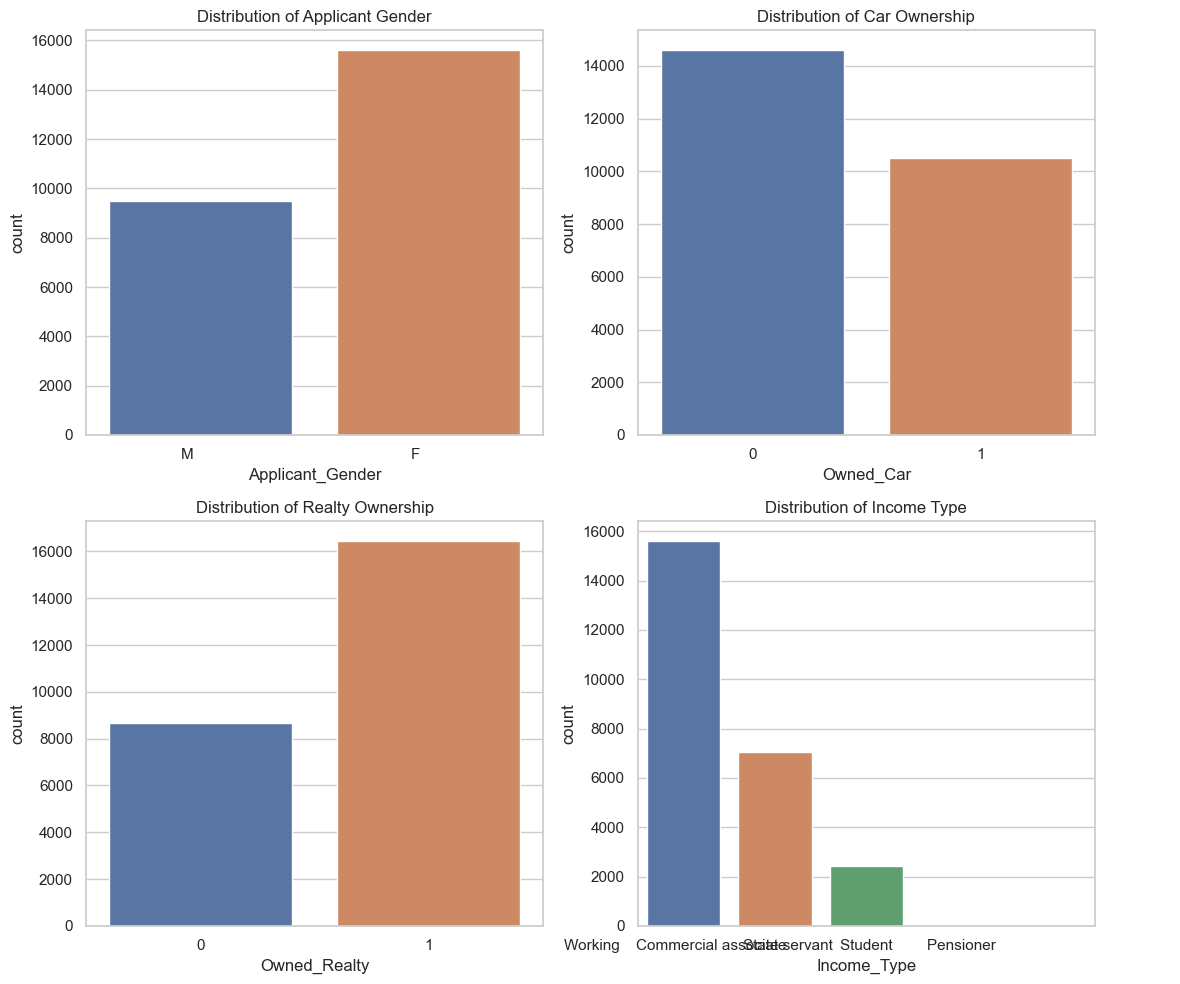

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

sns.countplot(x='Applicant_Gender', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Applicant Gender')

sns.countplot(x='Owned_Car', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Car Ownership')

sns.countplot(x='Owned_Realty', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Realty Ownership')

sns.countplot(x='Income_Type', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Income Type')

plt.tight_layout()
plt.show()

## Distribution of Numerical Variables

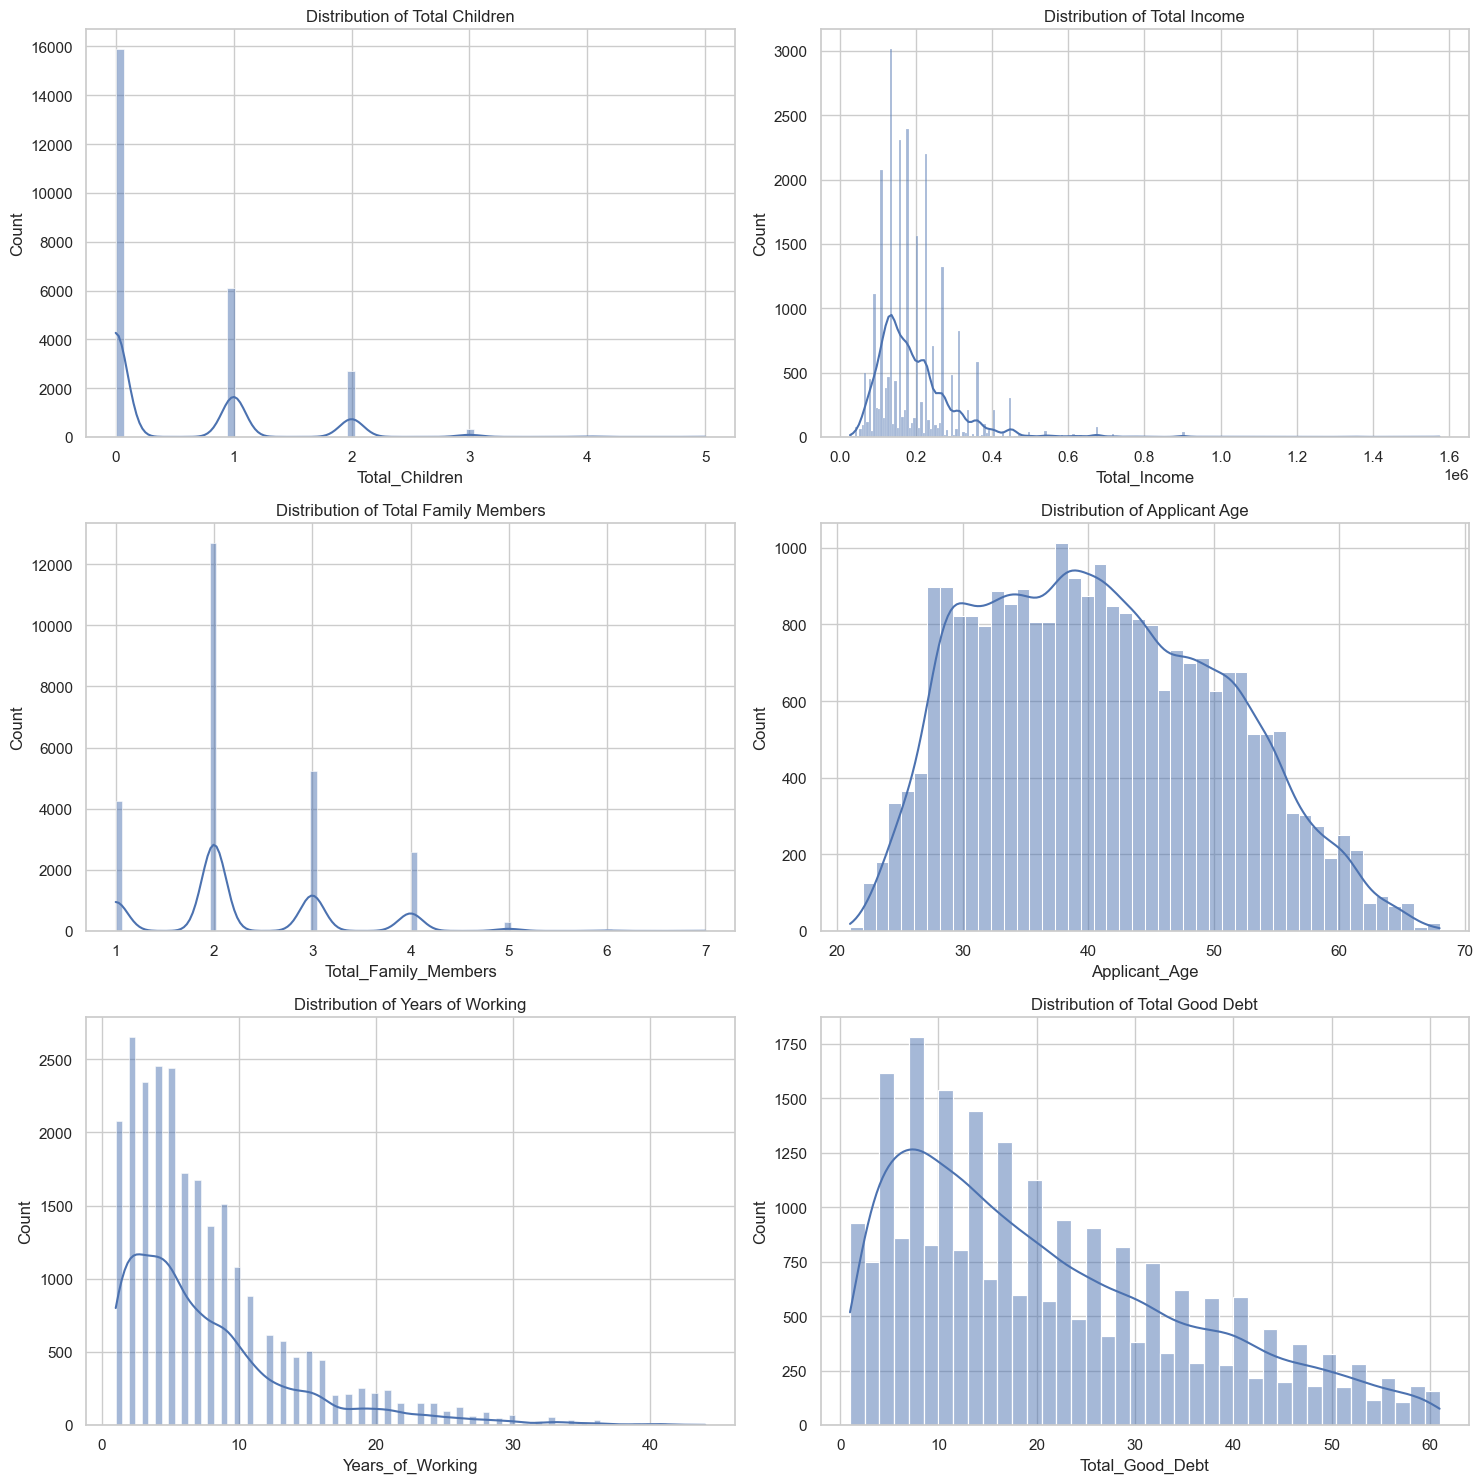

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

sns.histplot(df['Total_Children'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Total Children')

sns.histplot(df['Total_Income'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Total Income')

sns.histplot(df['Total_Family_Members'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Total Family Members')

sns.histplot(df['Applicant_Age'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Applicant Age')

sns.histplot(df['Years_of_Working'], kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Distribution of Years of Working')

sns.histplot(df['Total_Good_Debt'], kde=True, ax=axes[2, 1])
axes[2, 1].set_title('Distribution of Total Good Debt')

plt.tight_layout()
plt.show()

## Correlation Matrix

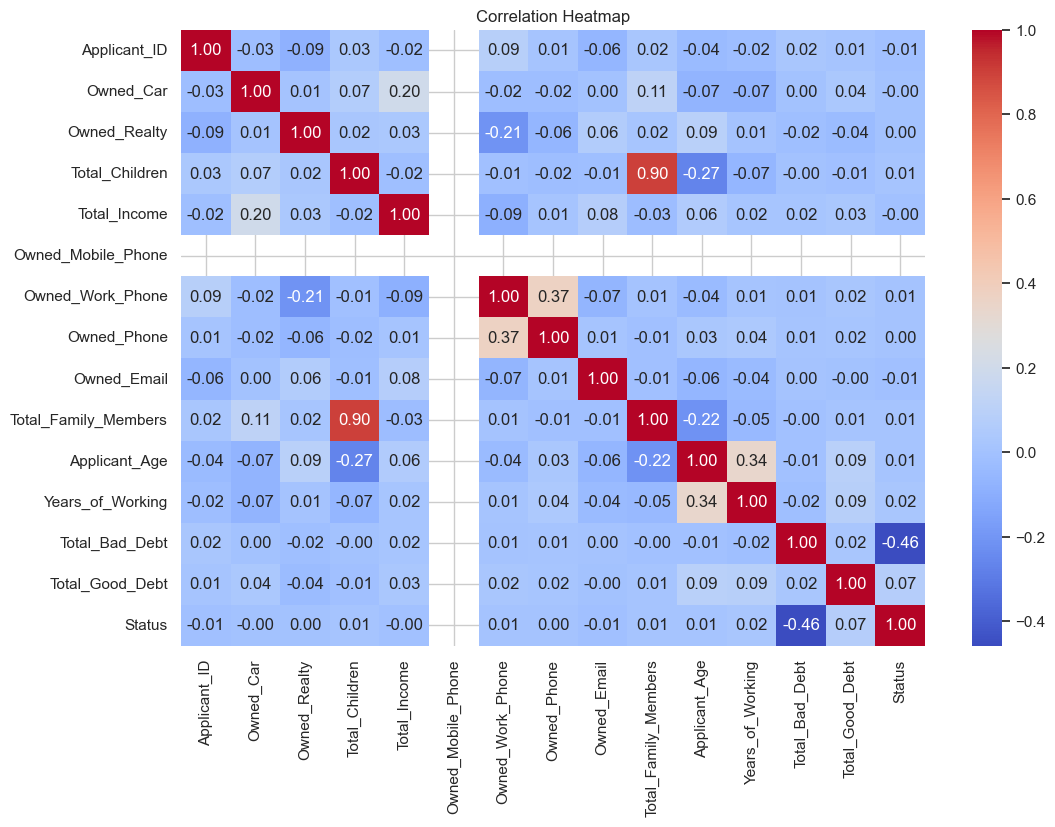

In [8]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Data Pre-Processing 

## Data Cleaning 

In [9]:
# Remove irrelevant columns
df.drop(['Applicant_ID'], axis=1, inplace=True) # applicant ID is irrelevant to the outcome 
df.drop(['Job_Title'], axis=1, inplace=True)
# Print the dataset after dropping the irrelevant columns 
print("Dataset after irrelevant columns: ")
df.head(15)

Dataset after irrelevant columns: 


,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,Owned_Mobile_Phone,Owned_Work_Phone,Owned_Phone,Owned_Email,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
0,M,1,1,0,112500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,1,0,0,0,2,59,4,0,30,1
1,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,1,0,1,1,1,53,9,0,5,1
2,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,1,0,1,1,1,53,9,0,5,1
3,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,1,0,1,1,1,53,9,0,27,1
4,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,1,0,1,1,1,53,9,0,39,1
5,M,1,1,0,270000,Working ...,Higher education ...,Married ...,House / apartment ...,1,1,1,1,2,47,3,0,6,1
6,M,1,1,0,135000,Commercial associate ...,Secondary / secondary special ...,Married ...,House / apartment ...,1,0,0,0,2,49,4,0,8,1
7,M,1,1,0,135000,Commercial associate ...,Secondary / secondary special ...,Married ...,House / apartment ...,1,0,0,0,2,49,4,0,9,1
8,M,1,1,0,135000,Commercial associate ...,Secondary / secondary special ...,Married ...,House / apartment ...,1,0,0,0,2,49,4,0,9,1
9,M,1,1,0,135000,Commercial associate ...,Secondary / secondary special ...,Married ...,House / apartment ...,1,0,0,0,2,49,4,0,9,1


In [10]:
df.value_counts("Income_Type")

Income_Type
Working                                               15616
Commercial associate                                   7052
State servant                                          2437
Pensioner                                                13
Student                                                  10
dtype: int64

In [11]:
df.value_counts("Education_Type")

Education_Type
Secondary / secondary special                         16802
Higher education                                       7132
Incomplete higher                                       993
Lower secondary                                         187
Academic degree                                          14
dtype: int64

In [12]:
df.value_counts("Family_Status")

Family_Status
Married                                               17507
Single / not married                                   3444
Civil marriage                                         2133
Separated                                              1464
Widow                                                   580
dtype: int64

In [13]:
df.value_counts("Housing_Type")

Housing_Type
House / apartment                                     22096
With parents                                           1430
Municipal apartment                                     812
Rented apartment                                        439
Office apartment                                        199
Co-op apartment                                         152
dtype: int64

In [14]:
# Remove the 'non-existent' duplicate value
df.drop_duplicates(inplace=True)

In [15]:
# Print the dataset shape after deleting duplicated values to avoid data leakage
print("Dataset shape after deleting all duplicate values: ", df.shape, '\n')

Dataset shape after deleting all duplicate values:  (19393, 19) 



In [16]:
# Check for categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns
print("\nCategorical Columns:")
print(categorical_columns)


Categorical Columns:
Index(['Applicant_Gender', 'Income_Type', 'Education_Type', 'Family_Status',
       'Housing_Type'],
      dtype='object')


In [17]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder

# Encode using label encoder 
le = LabelEncoder()

# Categorical features
categorical_columns = ['Applicant_Gender', 'Income_Type', 'Education_Type', 'Family_Status','Housing_Type']

for column in categorical_columns:
    df[column] = le.fit_transform(df[column])

# Print information about the dataframe with what type of data included 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19393 entries, 0 to 25127
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Applicant_Gender      19393 non-null  int32
 1   Owned_Car             19393 non-null  int64
 2   Owned_Realty          19393 non-null  int64
 3   Total_Children        19393 non-null  int64
 4   Total_Income          19393 non-null  int64
 5   Income_Type           19393 non-null  int32
 6   Education_Type        19393 non-null  int32
 7   Family_Status         19393 non-null  int32
 8   Housing_Type          19393 non-null  int32
 9   Owned_Mobile_Phone    19393 non-null  int64
 10  Owned_Work_Phone      19393 non-null  int64
 11  Owned_Phone           19393 non-null  int64
 12  Owned_Email           19393 non-null  int64
 13  Total_Family_Members  19393 non-null  int64
 14  Applicant_Age         19393 non-null  int64
 15  Years_of_Working      19393 non-null  int64
 16  Tota

In [18]:
# Check the dataset after handling outliers 
df.head(20)

,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,Owned_Mobile_Phone,Owned_Work_Phone,Owned_Phone,Owned_Email,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
0,1,1,1,0,112500,4,4,1,1,1,0,0,0,2,59,4,0,30,1
1,0,0,1,0,270000,0,4,3,1,1,0,1,1,1,53,9,0,5,1
3,0,0,1,0,270000,0,4,3,1,1,0,1,1,1,53,9,0,27,1
4,0,0,1,0,270000,0,4,3,1,1,0,1,1,1,53,9,0,39,1
5,1,1,1,0,270000,4,1,1,1,1,1,1,1,2,47,3,0,6,1
6,1,1,1,0,135000,0,4,1,1,1,0,0,0,2,49,4,0,8,1
7,1,1,1,0,135000,0,4,1,1,1,0,0,0,2,49,4,0,9,1
10,1,1,1,0,135000,0,4,1,1,1,0,0,0,2,49,4,0,5,1
11,1,1,1,0,135000,0,4,1,1,1,0,0,0,2,49,4,0,4,1
12,0,1,0,0,130500,4,2,1,1,1,0,0,0,2,30,4,1,25,1


<Axes: >

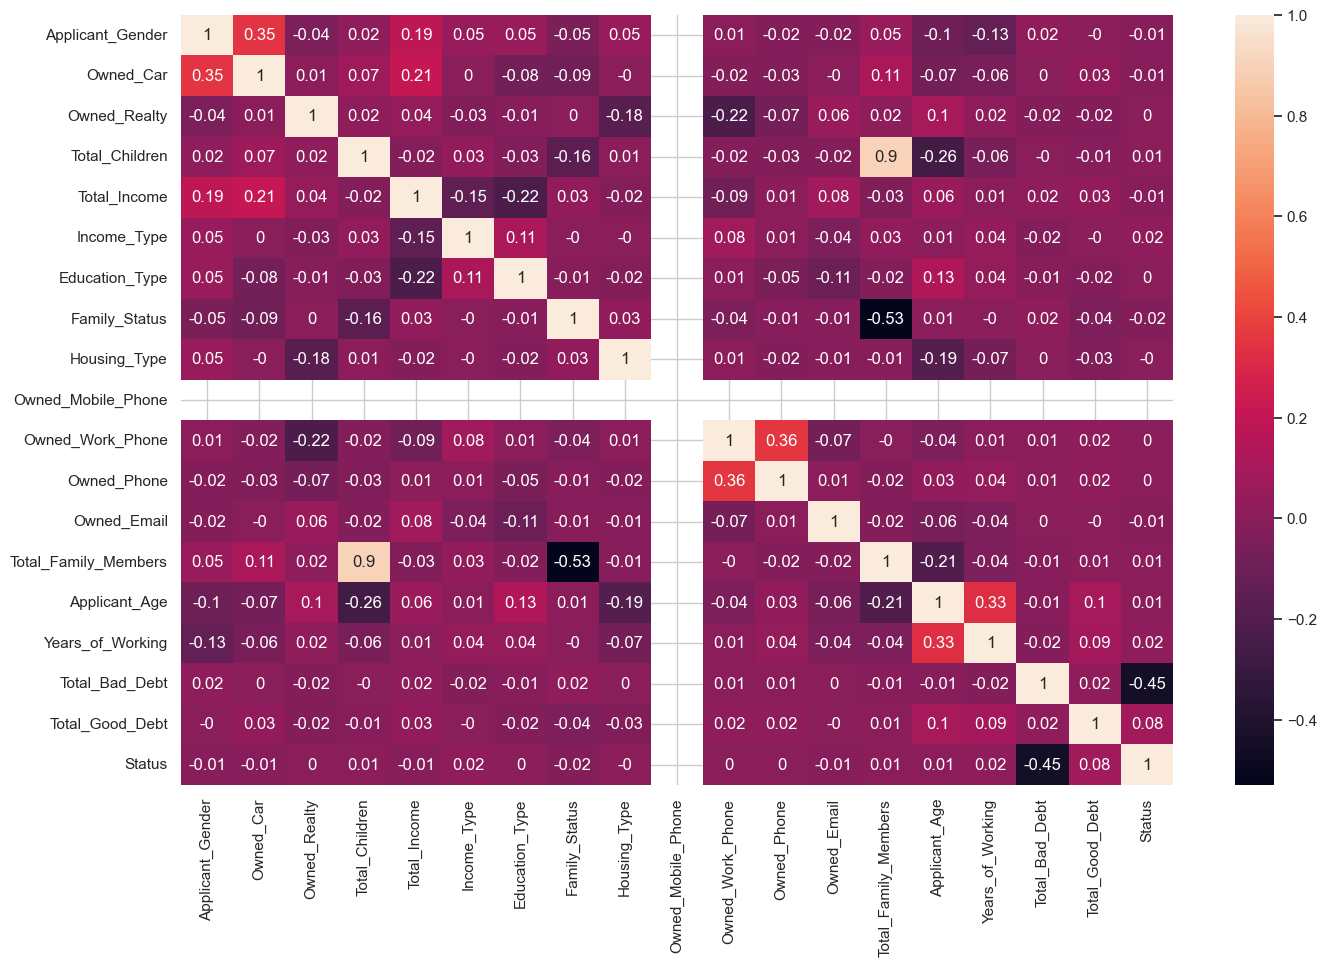

In [19]:
# Visualise the correlation matrix 
plt.figure(figsize=(16,10))
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [20]:
df.value_counts("Total_Children")

Total_Children
0    12383
1     4608
2     2095
3      255
4       44
5        8
dtype: int64

In [21]:
df.value_counts("Income_Type")

Income_Type
4    12064
0     5481
2     1826
1       13
3        9
dtype: int64

In [22]:
df.value_counts("Education_Type")

Education_Type
4    13006
1     5446
2      784
3      146
0       11
dtype: int64

In [23]:
df.value_counts("Family_Status")

Family_Status
1    13517
3     2618
0     1675
2     1122
4      461
dtype: int64

In [24]:
df.value_counts("Housing_Type")

Housing_Type
1    17024
5     1138
2      639
4      329
3      154
0      109
dtype: int64

In [25]:
df.value_counts("Total_Family_Members")

Total_Family_Members
2    9870
3    3954
1    3287
4    1984
5     251
6      39
7       8
dtype: int64

## Splitting Dataset - Training and Testing

### Checking Linearity 

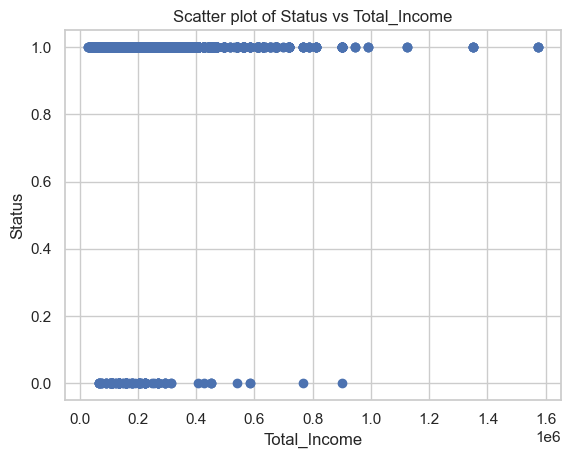

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot of the target variable against one of the input features
plt.scatter(df['Total_Income'], df['Status'])
plt.xlabel('Total_Income')
plt.ylabel('Status')
plt.title('Scatter plot of Status vs Total_Income')
plt.show()

### Feature Scaling 

In [27]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

X = df.drop(['Status'], axis=1)
y = df['Status']

# scaling the data
def scaled_data(df_x):
    scale.fit(df_x)
    X = scale.transform(df_x)
    return X

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled= train_test_split(X,y, test_size=0.25, random_state= 42)

In [28]:
# importing necessary libraries for balancing of dataset
from imblearn.over_sampling import SMOTE

# applying SMOTE to balance the dataset
X_resampled, y_resampled = SMOTE().fit_resample(X_train_scaled, y_train_scaled.values.ravel())

# Splitting the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=0)

## Applying ML Algorithm 

In [29]:
from sklearn import metrics
from sklearn.metrics import classification_report
import time

def fitTest(model, show_score):
    start = time.time()
    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    end = time.time()
    time_taken = end-start
    if show_score:
        print("Using: ", str(model))
        print("Training score: {:.3f}".format(model.score(X_train, y_train)))
        print("Accuracy score: {:.3f}".format(metrics.accuracy_score(y_test, y_pred)))
        print(classification_report(y_test, y_pred))
        print("Time taken to complete: {:.3f} seconds".format(time_taken))        

In [30]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

fitTest(xgb, show_score=True)

Using:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Training score: 1.000
Accuracy score: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3679
           1       1.00      1.00      1.00      3553

    accuracy              

### Model Tuning - Hyperparameters 

In [31]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import time

# Start measuring time
start_time = time.time()

# Define hyperparameters for the XGBoost model
param_dist_xgb = {
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.5, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.8, 1.0]
}

# Create an XGBoost Classifier
xgb_classifier = XGBClassifier()

# Apply randomized search for the model
random_search_xgb = RandomizedSearchCV(xgb_classifier, param_distributions=param_dist_xgb, n_iter=100, cv=5, n_jobs=-1)

# Fit the model with the best hyperparameters
random_search_xgb.fit(X_train, y_train)

# Stop measuring time
end_time = time.time()

# Calculate the time taken
time_taken = end_time - start_time

# Get the best hyperparameters for the model
best_params_xgb = random_search_xgb.best_params_

# Display the best hyperparameters and time taken
print("Best Hyperparameters - XGBoost:", best_params_xgb)
print("Time taken to complete: {:.3f} seconds".format(time_taken))


Best Hyperparameters - XGBoost: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 0.5}
Time taken to complete: 70.429 seconds


## Model Evaluation

In [35]:
from sklearn.metrics import classification_report, accuracy_score

# Create an XGBoostClassifier model with the best parameters
xgb_model = XGBClassifier(
    subsample = 0.8,
    n_estimators = 300,
    max_depth = 10,
    learning_rate = 0.05,
    gamma = 0.2,
    colsample_bytree = 0.5
)

# Fit the model on the scaled training data
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_predict = xgb_model.predict(X_test)

# Display the accuracy score
accuracy = accuracy_score(y_test, xgb_predict)
print(f"Accuracy Score: {accuracy:.4f}")

# Display the classification report
print("Classification Report - XGBoost Classifier:")
print(classification_report(y_test, xgb_predict))


Accuracy Score: 0.9996
Classification Report - XGBoost Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3679
           1       1.00      1.00      1.00      3553

    accuracy                           1.00      7232
   macro avg       1.00      1.00      1.00      7232
weighted avg       1.00      1.00      1.00      7232



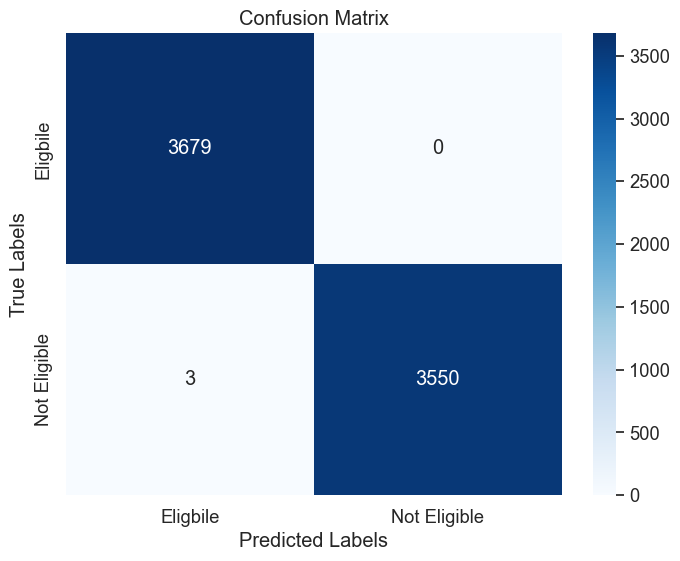

In [37]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, xgb_predict)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size for better readability
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Eligbile', 'Not Eligible'], yticklabels=['Eligbile', 'Not Eligible'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Saving Model in Pickle

In [34]:
import pickle

# Create an XGBoostClassifier model with the best parameters
xgb_model = XGBClassifier(
    subsample = 1.0, 
    n_estimators = 300,
    max_depth = 5,
    learning_rate = 0.1,
    gamma = 0, 
    colsample_bytree = 0.8
)

# Fit the model on the scaled training data
xgb_model.fit(X_train, y_train)

pickle.dump(xgb_model, open('model.pkl','wb'))